# **Workflow**

1. Data Collection
2. Data Cleaning & Checking
3. Visualize Data & Checking
4. Splitting Data
5. Training Model Using XGBRegressor
6. Evaluate Model
7. Prediction

## **Import Libraries**

Import the important module

In [117]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
import pandas.util.testing as tm

## **Load Data**

In [118]:
carData = pd.read_csv('/content/Car Data v3.csv')

## **Data Cleaning & Checking**

In [119]:
# Getting first 5 row of the data
carData.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [120]:
# Getting last 5 row of the data
carData.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [121]:
# Getting the statistics report from the data
carData.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [122]:
# Getting some information about the data frame
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [123]:
# Checking the number of missing values
carData.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [124]:
# Checking the shape of data
carData.shape

(8128, 13)

In [125]:
# Find value class width of price
range = carData.selling_price.max() - carData.selling_price.min()
classWidth = range/len(carData)
print(f'Class Width : {classWidth}')

Class Width : 1226.6241387795276


In [126]:
# Looking and Checking the actual Mean value of data
def checkStatisticsMean(data):
    ch1 = data.selling_price.mean()
    ch2 = data.seats.mean()
    ch3 = data.km_driven.mean()
    ch4 = data.year.mean()

    print(f'Price Mean : {ch1}')
    print(f'Seats Mean : {ch2}')
    print(f'Km Driven Mean : {ch3}')
    print(f'Year Mean : {ch4}')

checkStatisticsMean(carData)

Price Mean : 638271.8077017716
Seats Mean : 5.41671936259011
Km Driven Mean : 69819.51082677166
Year Mean : 2013.8040108267717


In [127]:
# Looking and Checking the actual Max value of data
def checkStatisticsMax(data):
    ch1 = data.selling_price.max()
    ch2 = data.seats.max()
    ch3 = data.km_driven.max()
    ch4 = data.year.max()

    print(f'Price Max : {ch1}')
    print(f'Seats Max : {ch2}')
    print(f'Km Driven Max : {ch3}')
    print(f'Year Max : {ch4}')

checkStatisticsMax(carData)

Price Max : 10000000
Seats Max : 14.0
Km Driven Max : 2360457
Year Max : 2020


In [128]:
# Looking and Checking the actual Min value of data
def checkStatisticsMin(data):
    ch1 = data.selling_price.min()
    ch2 = data.seats.min()
    ch3 = data.km_driven.min()
    ch4 = data.year.min()

    print(f'Price Min : {ch1}')
    print(f'Seats Min : {ch2}')
    print(f'Km Driven Min : {ch3}')
    print(f'Year Min : {ch4}')

checkStatisticsMin(carData)

Price Min : 29999
Seats Min : 2.0
Km Driven Min : 1
Year Min : 1983


In [129]:
# Looking and Checking the distribution categorical data
def checkDistributionCategorical(data):
    ch1 = data.fuel.value_counts()
    ch2 = data.transmission.value_counts()
    ch3 = data.seller_type.value_counts()
    ch4 = data.owner.value_counts()

    print(f'Fuel Data :\n{ch1}\n')
    print(f'Transmission Data :\n{ch2}\n')
    print(f'Seller Type :\n{ch3}\n')
    print(f'Owner :\n{ch4}\n')

checkDistributionCategorical(carData)

Fuel Data :
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

Transmission Data :
Manual       7078
Automatic    1050
Name: transmission, dtype: int64

Seller Type :
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

Owner :
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64



In [130]:
# Encode Fuel Data
carData.replace({'fuel':{'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3}}, inplace=True)

# Encode Transmission Data
carData.replace({'transmission':{'Manual': 0, 'Automatic': 1}}, inplace=True)

# Encode Seller Type Data
carData.replace({'seller_type':{'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}}, inplace=True)

# Encode Owner Data
carData.replace({'owner':{'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4}}, inplace=True)

In [131]:
# Checking is the data succesfully Encode
carData.loc[:, ['fuel', 'transmission', 'seller_type', 'owner']]

,fuel,transmission,seller_type,owner
0,0,0,0,0
1,0,0,0,1
2,1,0,0,2
3,0,0,0,0
4,1,0,0,0
...,...,...,...,...
8123,1,0,0,0
8124,0,0,0,3
8125,0,0,0,0
8126,0,0,0,0


In [132]:
# Fixing missing value
carData.dropna(inplace=True)

In [133]:
# Checking is the data have Null or Nah
carData.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [134]:
# Checking the Object type
carData.loc[:, ['mileage', 'engine', 'max_power', 'torque']]

,mileage,engine,max_power,torque
0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"
...,...,...,...,...
8123,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm
8124,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)"
8125,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm
8126,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm


In [135]:
# Cleaning mileage data
carData['mileage'] = carData['mileage'].str.replace('kmpl', '').str.replace('km/kg', '').str.replace(',', '')

# Cleaning engine data
carData['engine'] = carData['engine'].str.replace('CC', '').str.replace(',', '')

# Cleaning max_power data
carData['max_power'] = carData['max_power'].str.replace('bhp', '').str.replace(',', '')

In [136]:
# Convert mileage data to numeric
carData['mileage'] = pd.to_numeric(carData['mileage'])

# Convert engine data to numeric
carData['engine'] = pd.to_numeric(carData['engine'])

# Convert max_power data to numeric
carData['max_power'] = pd.to_numeric(carData['max_power'])

In [137]:
# Getting some information about the data frame
carData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   int64  
 5   seller_type    7906 non-null   int64  
 6   transmission   7906 non-null   int64  
 7   owner          7906 non-null   int64  
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   int64  
 10  max_power      7906 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(3), int64(8), object(2)
memory usage: 864.7+ KB


In [138]:
# Make a correlation data to knowing Value Strength and Direction of Linear Relationship
correlation = carData.corr()

## **Visualize Data & Checking**

In [139]:
# Setting sns theme
sns.set_theme(color_codes=True, style='darkgrid', palette='deep', font='sans-serif')

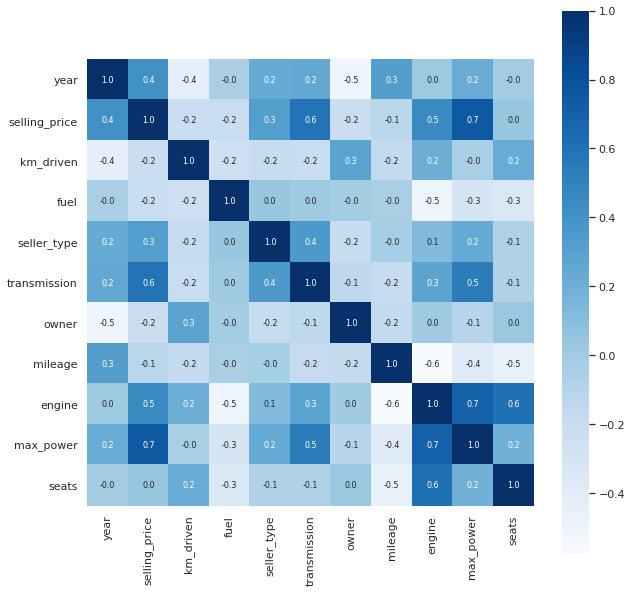

In [140]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

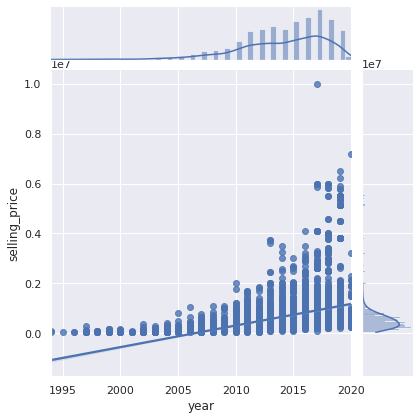

In [141]:
sns.jointplot(x="year", y="selling_price", data=carData, kind="reg")

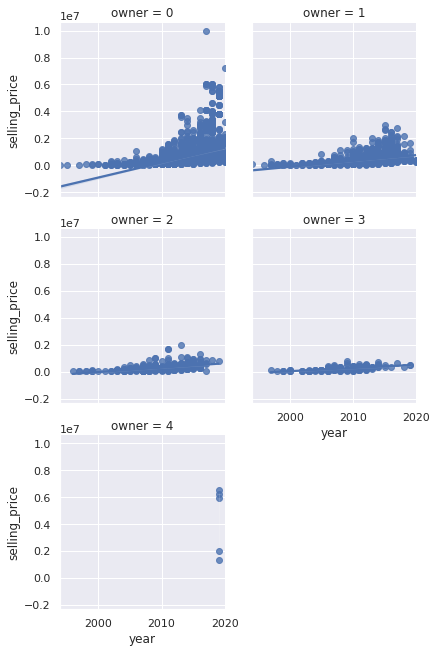

In [142]:
sns.lmplot(x="year", y="selling_price", col="owner", data=carData, col_wrap=2, height=3)

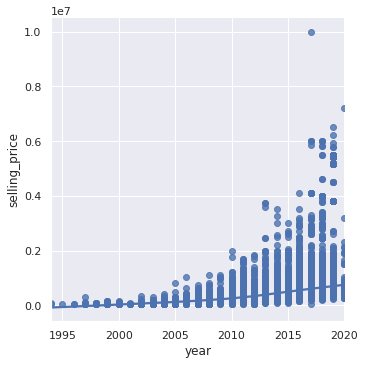

In [143]:
sns.lmplot(x="year", y="selling_price", data=carData, lowess=True)

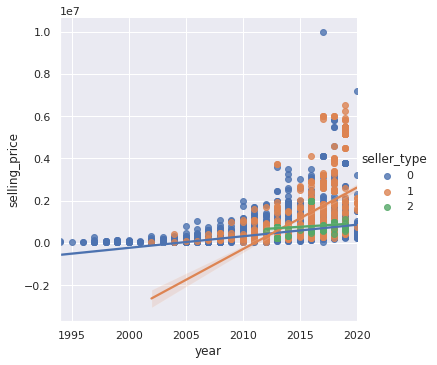

In [144]:
sns.lmplot(x="year", y="selling_price", hue="seller_type", data=carData)

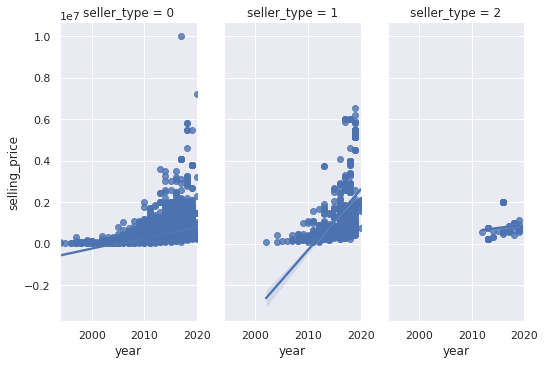

In [145]:
sns.lmplot(x="year", y="selling_price", col="seller_type", data=carData, aspect=.5)

In [146]:
# Checking the data
carData.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,0,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,1,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,2,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,0,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,0,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [147]:
# Checking the type of data
carData.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
mileage          float64
engine             int64
max_power        float64
torque            object
seats            float64
dtype: object

## **Splitting Data**

In [148]:
X = carData.drop(['name', 'selling_price', 'torque'], axis=1)
y = carData['selling_price']

In [149]:
trainX, testX, trainY, testY = train_test_split(
    X, y,
    test_size=0.1,
    shuffle=False,
    random_state=1
)

## **Training Model With XGBRegressor**

In [150]:
model = XGBRegressor(
    n_estimators=500, 
    learning_rate=0.5, 
    random_state=1, 
    booster='gbtree', 
    verbosity=1, 
    n_jobs=5)

model.fit(trainX, trainY)

[13:47:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=5, nthread=None, objective='reg:linear', random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## **Evaluate Model**

In [151]:
# predict X train
trainPredict = model.predict(trainX)

# predict X test  
testPredict = model.predict(testX)

In [152]:
# Train X 

# R Squared 
trainRsquared = metrics.r2_score(trainY, trainPredict)
print(f'R-Squared : {trainRsquared}')

# Mean Absolute Error
trainMAE = metrics.mean_absolute_error(trainY, trainPredict)
print(f'MAE : {trainMAE}')

#  Mean Squared Error
trainMSE = metrics.mean_squared_error(trainY, trainPredict)
print(f'MSE : {trainMSE}')

#  Root Mean Squared Error
trainRMSE = math.sqrt(metrics.mean_squared_error(trainY, trainPredict))
print(f'RMSE : {trainRMSE}')

# Median
trainM = metrics.median_absolute_error(trainY, trainPredict)
print(f'Median : {trainM}')

R-Squared : 0.9947149320317166
MAE : 41411.222458604185
MSE : 3502198745.0653515
RMSE : 59179.37770089638
Median : 29002.21875


In [153]:
# Train X 

# R Squared 
testRsquared = metrics.r2_score(testY, testPredict)
print(f'R-Squared : {testRsquared}')

# Mean Absolute Error
testMAE = metrics.mean_absolute_error(testY, testPredict)
print(f'MAE : {testMAE}')

#  Mean Squared Error
testMSE = metrics.mean_squared_error(testY, testPredict)
print(f'MSE : {testMSE}')

#  Root Mean Squared Error
testRMSE = math.sqrt(metrics.mean_squared_error(testY, testPredict))
print(f'RMSE : {testRMSE}')

# Median
testM = metrics.median_absolute_error(testY, testPredict)
print(f'Median : {testM}')

R-Squared : 0.9620368487468594
MAE : 82121.06699391593
MSE : 24802076270.51157
RMSE : 157486.74950773342
Median : 44601.25


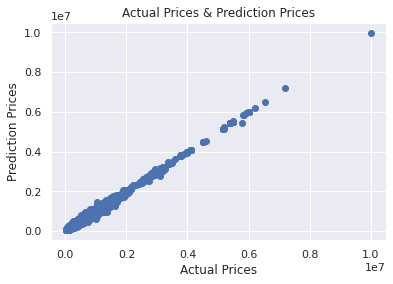

In [154]:
# train data
plt.scatter(trainY, trainPredict)
plt.title('Actual Prices & Prediction Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Prediction Prices')
plt.grid(True)
plt.show()

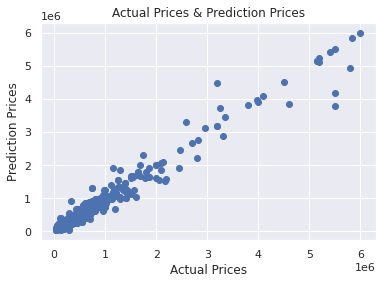

In [155]:
# test data
plt.scatter(testY, testPredict)
plt.title('Actual Prices & Prediction Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Prediction Prices')
plt.grid(True)
plt.show()

## **Prediction**

In [156]:
trainOutput = pd.DataFrame({
    'Train Actual Price': trainY,
    'Train Predicted Price ': trainPredict})

trainOutput.to_csv('Train Prediction.csv', index=False)

In [160]:
trainDataPredict = pd.read_csv('/content/Train Prediction')
trainDataPredict.head()

,Train Actual Price,Train Predicted Price
0,450000,456960.38
1,370000,491535.20
2,158000,178206.06
3,225000,288113.06
4,130000,190494.73


In [157]:
testOutput = pd.DataFrame({
    'Train Actual Price': testY,
    'Train Predicted Price ': testPredict})

testOutput.to_csv('Test Prediction.csv', index=False)

In [161]:
testDataPredict = pd.read_csv('/content/Test Prediction')
testDataPredict.head()

,Train Actual Price,Train Predicted Price
0,250000,372075.70
1,275000,253187.23
2,454000,471500.97
3,600000,693261.70
4,400000,279168.20
